In [1]:
import numpy as np
import pandas as pd
from os import fspath
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load the data

In [2]:
data = pd.read_csv(fspath('../storage/1.01. Simple linear regression.csv'))

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


- SAT = Critical Reading + Mathematics + Writing
- GPA = Grade point average (at graduation from university)

We will create a linear regression which predicts GPA based on the SAT score obtained

## Define the dependent and independent variables

In [5]:
y = data['GPA']
x1 = data['SAT']

## Explore the data

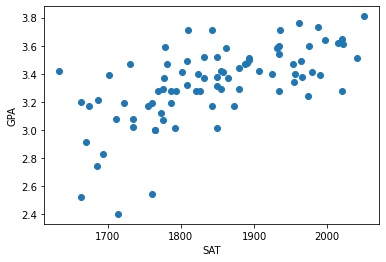

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

## Regression
Create coefficient variable

In [9]:
x = sm.add_constant(x1)

In [14]:
x.head()

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693


Results will contain the output of the Ordinary Least Squares (OLS) regression

In [15]:
results = sm.OLS(y, x).fit()

fit() will apply a specific estimation technique (OLS in this case) to obtain the fit of the model

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 24 Mar 2020   Prob (F-statistic):           7.20e-11
Time:                        22:37:44   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plot the regression line

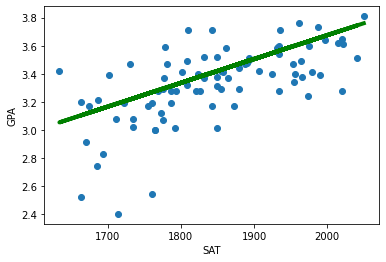

In [19]:
plt.scatter(x=x1, y=y)
yhat = 0.0017*x1 + 0.2750
fig = plt.plot(x1, yhat, lw=2, c='green', label='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()